In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the dataset
california = fetch_california_housing()

In [3]:
# Convert to DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target

# Show first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Check missing values
print(df.isnull().sum())

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Target', axis=1))

# Create a scaled DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=california.feature_names)
df_scaled['Target'] = df['Target']

# Confirm scaling
df_scaled.head()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


In [7]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('Target', axis=1)
y = df_scaled['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [11]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [14]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


In [16]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a function for evaluation
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Evaluate each model
models = {
    "Linear Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "SVR": y_pred_svr
}

results = {}

for model_name, predictions in models.items():
    results[model_name] = evaluate_model(y_test, predictions)

# Convert to DataFrame
results_df = pd.DataFrame(results, index=['MSE', 'MAE', 'R2']).T
print(results_df)


                        MSE       MAE        R2
Linear Regression  0.555892  0.533200  0.575788
Decision Tree      0.494272  0.453784  0.622811
Random Forest      0.255498  0.327613  0.805024
Gradient Boosting  0.293999  0.371650  0.775643
SVR                0.355198  0.397763  0.728941


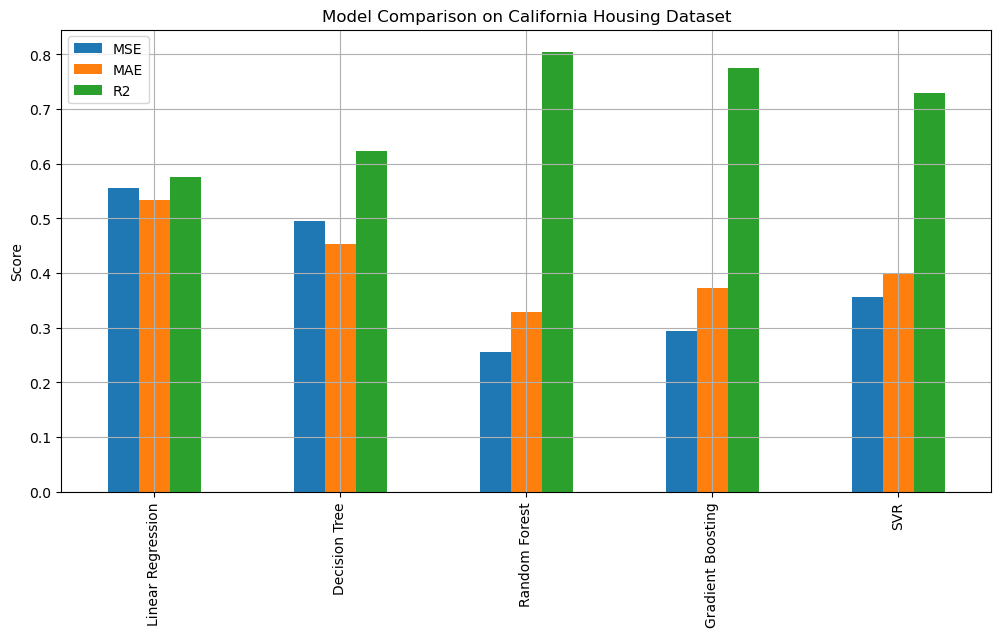

In [19]:
results_df.plot(kind='bar', figsize=(12, 6), title='Model Comparison on California Housing Dataset')
plt.ylabel('Score')
plt.grid(True)
plt.show()
